In [1]:
from brian2 import *
dt = 0.01*ms
defaultclock.dt = dt

In [2]:
import numpy as np
import pandas as pd

In [3]:
df_inp_traces = pd.read_csv('input_traces_hh.csv')


In [4]:
inp_traces = df_inp_traces.to_numpy()
inp_traces = inp_traces[:, 1:]
inp_traces

array([[0.e+00, 0.e+00, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00],
       [0.e+00, 0.e+00, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00],
       [2.e-09, 2.e-09, 2.e-09, ..., 0.e+00, 0.e+00, 0.e+00],
       [0.e+00, 0.e+00, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00],
       [0.e+00, 0.e+00, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00]])

In [61]:
# Generate a step-current input and an "experimental" voltage trace
input_current0 = np.hstack([np.zeros(int(5*ms/dt)), np.ones(int(5*ms/dt)), np.zeros(int(5*ms/dt)), np.ones(int(5*ms/dt)), np.zeros(int(5*ms/dt)) ])*500
input_current1 = np.hstack([np.zeros(int(5*ms/dt)), np.ones(int(5*ms/dt)), np.zeros(int(5*ms/dt)), np.ones(int(5*ms/dt)), np.zeros(int(5*ms/dt))])*1000
input_current2 = np.hstack([np.zeros(int(5*ms/dt)), np.ones(int(5*ms/dt)), np.ones(int(4*ms/dt)), np.zeros(int(1*ms/dt)-1), np.ones(int(5*ms/dt)), np.zeros(int(5*ms/dt))])*3000
input_current3 = np.hstack([np.zeros(int(5*ms/dt)), np.ones(int(5*ms/dt)), np.zeros(int(5*ms/dt)), np.ones(int(5*ms/dt)), np.zeros(int(5*ms/dt))])*5000

input_current = np.stack((input_current0, input_current1, input_current2, input_current3)) * uA

In [62]:
# input_current

In [63]:
g_L = 2*mS
g_Ca = 4*mS
g_K = 8*mS
V_L = -50*mV
V_Ca = 100*mV
V_K = -70*mV
lambda_n__max = 1.0/(15*ms)
V_1 = 10*mV
V_2 = 15*mV  # Note that Figure caption says -15 which seems to be a typo
V_3 = -1*mV
V_4 = 14.5*mV
C = 20*uF

In [64]:
# V,N-reduced system (Eq. 9 in article), note that the variables M and N (and lambda_N, etc.)
# have been renamed to m and n to better match the Hodgkin-Huxley convention, and because N has
# a reserved meaning in Brian (number of neurons)
eqs = '''
dV/dt = (-g_L*(V - V_L) - g_Ca*m_inf*(V - V_Ca) - g_K*n*(V - V_K) + I(t))/C : volt
dn/dt = lambda_n*(n_inf - n) : 1
m_inf = 0.5*(1 + tanh((V - V_1)/V_2)) : 1
n_inf = 0.5*(1 + tanh((V - V_3)/V_4)) : 1
lambda_n = lambda_n__max*cosh((V - V_3)/(2*V_4)) : Hz
'''


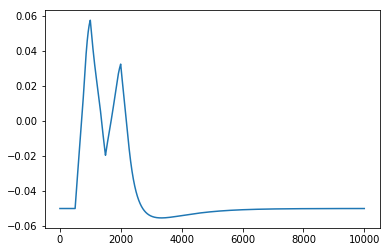

In [65]:
start_scope()
neuron = NeuronGroup(1, eqs, method='exponential_euler')
neuron.V = V_L
neuron.n = 'n_inf'
mon = StateMonitor(neuron, ['V', 'n'], record=True)
I = TimedArray(input_current[0], dt=dt)

run(100*ms)

voltage0 = mon.V[0]

plot(voltage0.transpose());

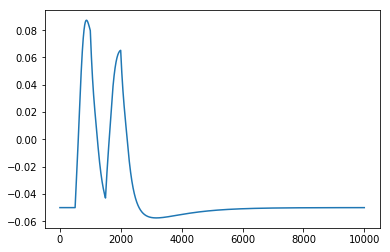

In [66]:
start_scope()
neuron = NeuronGroup(1, eqs, method='exponential_euler')
neuron.V = V_L
neuron.n = 'n_inf'
mon = StateMonitor(neuron, ['V', 'n'], record=True)
I = TimedArray(input_current[1], dt=dt)

run(100*ms)

voltage1 = mon.V[0]

plot(voltage1.transpose());

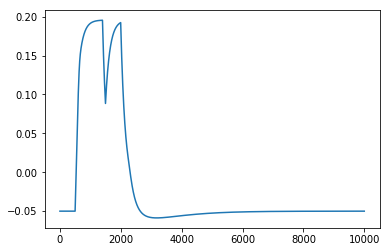

In [67]:
start_scope()
neuron = NeuronGroup(1, eqs, method='exponential_euler')
neuron.V = V_L
neuron.n = 'n_inf'
mon = StateMonitor(neuron, ['V', 'n'], record=True)
I = TimedArray(input_current[2], dt=dt)

run(100*ms)

voltage2 = mon.V[0]

plot(voltage2.transpose());

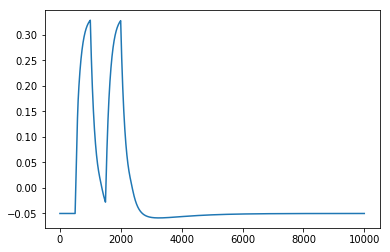

In [68]:
start_scope()
neuron = NeuronGroup(1, eqs, method='exponential_euler')
neuron.V = V_L
neuron.n = 'n_inf'
mon = StateMonitor(neuron, ['V', 'n'], record=True)
I = TimedArray(input_current[3], dt=dt)

run(100*ms)

voltage3 = mon.V[0]

plot(voltage3.transpose());

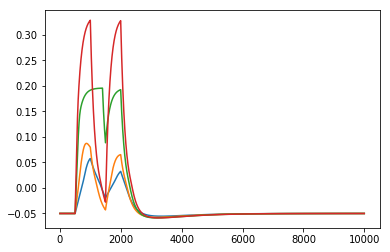

In [69]:
plot(voltage0.transpose());
plot(voltage1.transpose());
plot(voltage2.transpose());
plot(voltage3.transpose());